In [46]:
import numpy as np
import pylab as pl
import statsmodels.api as sm
import scipy as sp
import matplotlib.pyplot as plt
import scipy.stats  

%pylab inline

Populating the interactive namespace from numpy and matplotlib


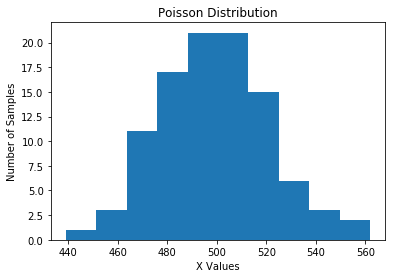

In [47]:
np.random.seed(14)
mean1 = 500
stdev = 9
Nsamples = 100
nit = 1000


x = sp.stats.poisson.rvs(mean1,size=Nsamples)
pl.hist(x)

xlabel('X Values')
ylabel('Number of Samples')
title('Poisson Distribution')

#Plot the original distribution

## Figure 1. Plotting 100 random samples in a Poisson Distribution with a Mean of 500

In [48]:
x

array([501, 529, 501, 502, 522, 502, 511, 542, 517, 529, 487, 511, 513,
       477, 532, 517, 516, 494, 497, 490, 491, 486, 476, 471, 468, 497,
       508, 473, 469, 497, 516, 485, 500, 509, 495, 462, 481, 562, 516,
       464, 496, 511, 496, 508, 482, 462, 486, 475, 487, 516, 484, 535,
       460, 532, 479, 494, 471, 492, 471, 548, 474, 508, 495, 478, 494,
       507, 500, 516, 480, 496, 510, 522, 500, 507, 504, 501, 519, 509,
       484, 496, 504, 553, 481, 496, 505, 494, 473, 493, 521, 439, 481,
       512, 513, 530, 504, 522, 488, 523, 465, 545])

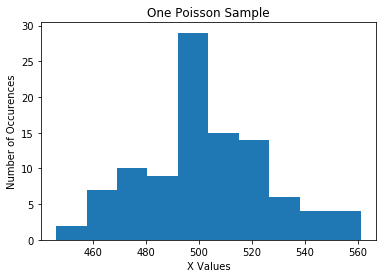

In [69]:
myDmeans = np.zeros(nit)
myStDevs = np.zeros(nit)
zs = np.zeros(nit)

for i in range(nit):
    mydistrib = sp.stats.poisson.rvs(mean1,size=Nsamples)
    myDmeans[i] = mydistrib.mean()
    myStDevs[i] = np.std(mydistrib)
    zs[i] = (myDmeans[i] - mean1) * np.sqrt(Nsamples) / myStDevs[i]
    
pl.hist(mydistrib)
title('One Poisson Sample')
xlabel('X Values')
ylabel('Number of Occurences')

## Fig 2. Plotting One of the Poisson Samples

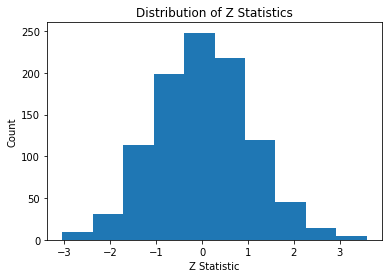

In [67]:
#zs = (myDmeans - mean1) * np.sqrt(Nsamples) / 
pl.hist(zs)
title('Distribution of Z Statistics')
xlabel('Z Statistic')
ylabel('Count')

#x = np.linspace(xmin, xmax, 100)
#y = norm.pdf(x, mean1, stdev)
#plt.plot(x, y)

## Fig 3. The Distribution of Z Statistics of Each Poisson Sample

In [68]:
print ("Z Scores vs normal distribution", scipy.stats.kstest(zs,'norm'))

Z Scores vs normal distribution KstestResult(statistic=0.01810982836671382, pvalue=0.89825769183085358)


The high p-value means the null hypothesis is not rejected, and the Z scores are likely drawn from the same distribution as a normal distribution.

(array([ 0.00149532,  0.01943917,  0.04934558,  0.14355077,  0.29457814,
         0.36336289,  0.32149391,  0.21084019,  0.07626135,  0.01495321]),
 array([-3.75811919, -3.08936625, -2.42061331, -1.75186037, -1.08310743,
        -0.41435449,  0.25439845,  0.92315139,  1.59190433,  2.26065727,
         2.92941021]),
 <a list of 10 Patch objects>)

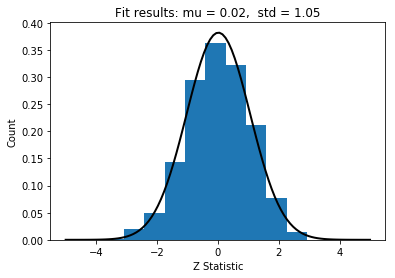

In [82]:
# Fit a normal distribution to the data:
mu, std = scipy.stats.norm.fit(zs)

# Plot the PDF.
xmin, xmax = -5,5
x = np.linspace(xmin, xmax, 100)
p = scipy.stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
xlabel('Z Statistic')
ylabel('Count')
pl.hist(zs,normed=1)


## Figure 4. The Distribution of Z Scores fitted with a normal distribution.